In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from featurewiz import featurewiz

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Imported version = 0.1.41.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
data = pd.read_csv('data/la-haute-borne-data-2017-2020.csv',sep=';')
data = data.drop('Va1_avg', 1)
data = data.drop('Va2_avg', 1)
data = data.drop('Pas_avg', 1)


In [3]:
labels = ["Ba_avg","Rt_avg","DCs_avg","Cm_avg","Q_avg","S_avg","Cosphi_avg","Ds_avg","Db1t_avg","Db2t_avg","Dst_avg","Gb1t_avg","Gb2t_avg","Git_avg","Gost_avg","Ya_avg","Yt_avg","Ws1_avg","Ws2_avg","Ws_avg","Wa_avg","Va_avg","Ot_avg","Nf_avg","Nu_avg","Rs_avg","Rbt_avg","Rm_avg","Wa_c_avg","Na_c_avg"]

In [4]:
selected_columns = data[["Ba_avg","Rt_avg","DCs_avg","Cm_avg","P_avg","Q_avg","S_avg","Cosphi_avg","Ds_avg","Db1t_avg","Db2t_avg","Dst_avg","Gb1t_avg","Gb2t_avg","Git_avg","Gost_avg","Ya_avg","Yt_avg","Ws1_avg","Ws2_avg","Ws_avg","Wa_avg","Va_avg","Ot_avg","Nf_avg","Nu_avg","Rs_avg","Rbt_avg","Rm_avg","Wa_c_avg","Na_c_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['Ba_avg'].notna()]
df = df[df['Rt_avg'].notna()]
df = df[df['DCs_avg'].notna()]
df = df[df['Cm_avg'].notna()]
df = df[df['P_avg'].notna()]
df = df[df['Q_avg'].notna()]
df = df[df['S_avg'].notna()]                 
df = df[df['Cosphi_avg'].notna()]
df = df[df['Ds_avg'].notna()]
df = df[df['Db1t_avg'].notna()]
df = df[df['Db2t_avg'].notna()]
df = df[df['Dst_avg'].notna()]
df = df[df['Gb1t_avg'].notna()]
df = df[df['Gb2t_avg'].notna()]
df = df[df['Git_avg'].notna()]
df = df[df['Gost_avg'].notna()]
df = df[df['Ya_avg'].notna()]
df = df[df['Yt_avg'].notna()]
df = df[df['Ws1_avg'].notna()]
df = df[df['Ws2_avg'].notna()]                         
df = df[df['Ws_avg'].notna()]
df = df[df['Wa_avg'].notna()]
df = df[df['Va_avg'].notna()]
df = df[df['Ot_avg'].notna()]
df = df[df['Nf_avg'].notna()]
df = df[df['Nu_avg'].notna()]                    
df = df[df['Rs_avg'].notna()]
df = df[df['Rbt_avg'].notna()]
df = df[df['Rm_avg'].notna()]
df = df[df['Wa_c_avg'].notna()]
df = df[df['Na_c_avg'].notna()]

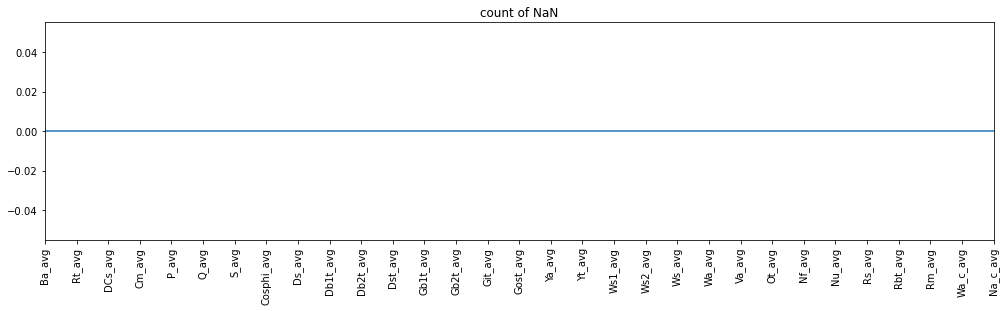

In [5]:
plt.figure(figsize=(17,4))
plt.plot(df.isnull().sum(axis = 0))
plt.xticks(rotation=90)
plt.margins(x=0)
plt.title('count of NaN')
plt.show()

In [6]:
x = df[["P_avg","Ba_avg","Rt_avg","DCs_avg","Cm_avg","Q_avg","S_avg","Cosphi_avg","Ds_avg","Db1t_avg","Db2t_avg","Dst_avg","Gb1t_avg","Gb2t_avg"]]
y = df[["P_avg","Git_avg","Gost_avg","Ya_avg","Yt_avg","Ws1_avg","Ws2_avg","Ws_avg","Wa_avg","Va_avg","Ot_avg","Nf_avg","Nu_avg","Rs_avg","Rbt_avg","Rm_avg","Wa_c_avg","Na_c_avg"]]

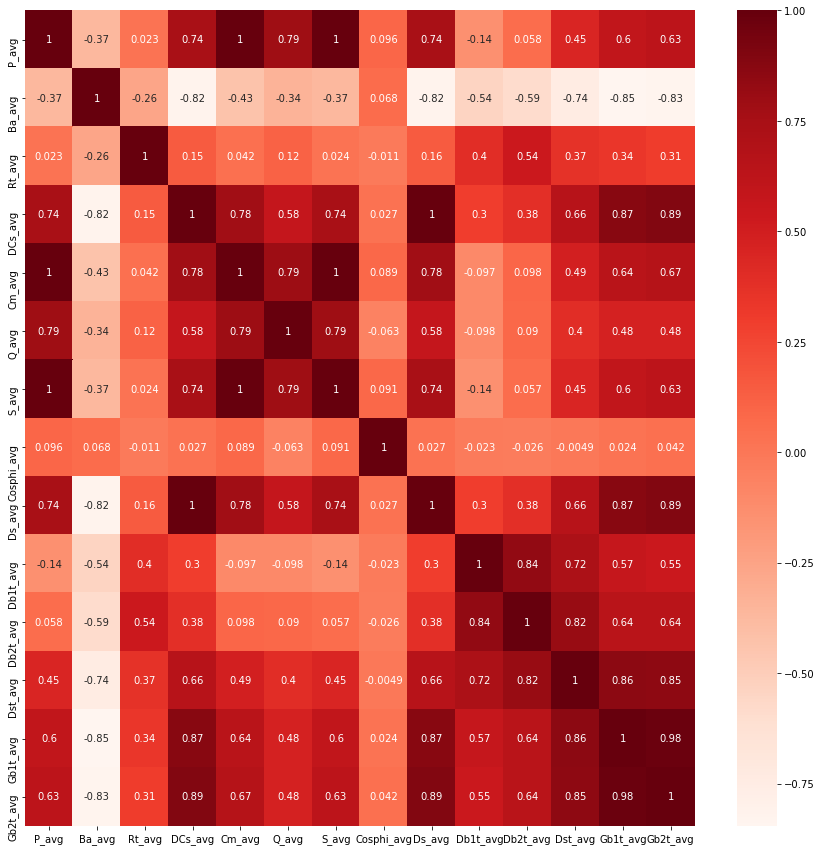

In [7]:
%matplotlib inline
plt.figure(figsize=(15,15))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

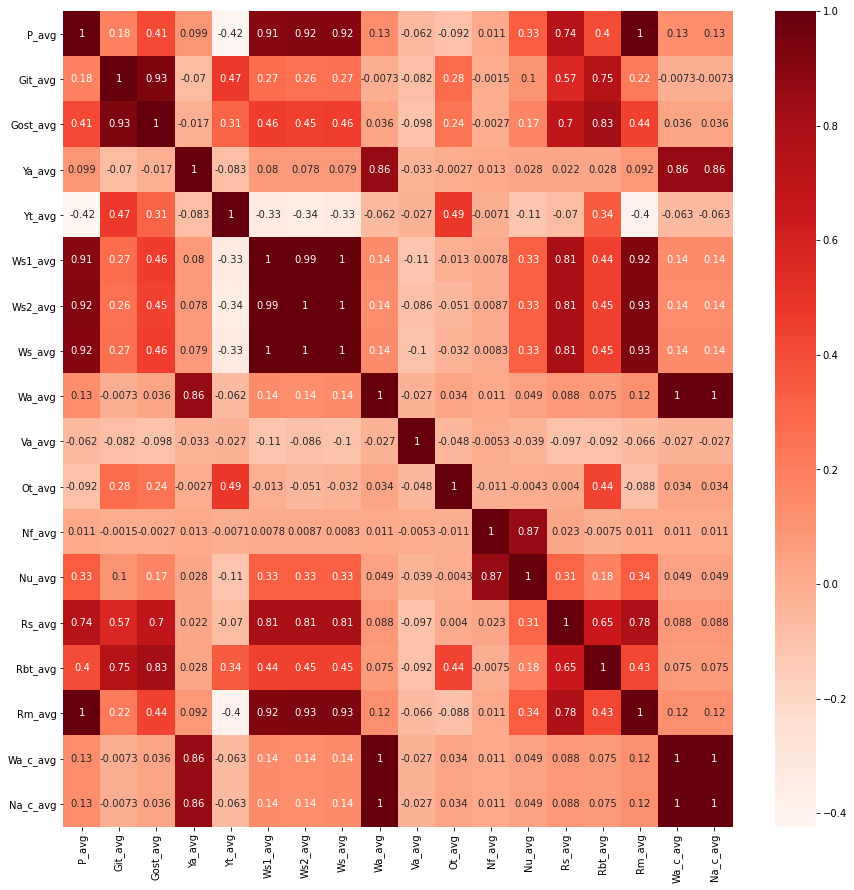

In [8]:
%matplotlib inline
plt.figure(figsize=(15,15))
cor = y.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
x = df
x = x.drop('P_avg', 1)
y = df['P_avg']

In [10]:
#recursive feature elimination
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

RFE_regressor = LinearRegression()

rfe = RFE(LinearRegression())

X_rfe = rfe.fit_transform(x,y)  

RFE_regressor.fit(x,y)
#print(labels)
#print(rfe.support_)
#print(rfe.ranking_)

LinearRegression()

In [11]:
a = labels
b = rfe.support_
c = rfe.ranking_
list = pd.DataFrame(
    {'name': a,
     'rfe_T/F': b,
     'ranking': c
    })
list


,name,rfe_T/F,ranking
0,Ba_avg,False,3
1,Rt_avg,False,11
2,DCs_avg,False,14
3,Cm_avg,False,12
4,Q_avg,True,1
5,S_avg,True,1
6,Cosphi_avg,True,1
7,Ds_avg,True,1
8,Db1t_avg,True,1
9,Db2t_avg,False,5


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [13]:
from sklearn.feature_selection import RFE
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

X = x_train
y = y_train

lin_reg = LinearRegression()

rfe_mod = RFE(lin_reg,n_features_to_select=4,step=1,importance_getter='auto')
myvalues=rfe_mod.fit(X,y)
myvalues.support_
myvalues.ranking_ 
rankings=pd.DataFrame(myvalues.ranking_)


In [14]:
a = rankings.values.flatten()
b = labels
list = pd.DataFrame(
    {'ranking_value': a,
     'name': b
     })
list
list1 = pd.DataFrame(list)
list.sort_values(by=['ranking_value'])

,ranking_value,name
19,1,Ws_avg
6,1,Cosphi_avg
18,1,Ws2_avg
17,1,Ws1_avg
5,2,S_avg
12,3,Gb2t_avg
11,4,Gb1t_avg
14,5,Gost_avg
22,6,Ot_avg
25,7,Rs_avg


In [15]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

model = SelectKBest(score_func=f_regression)
results = model.fit(X, y)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns

a = results_df.values.flatten()
b = results.pvalues_.flatten()
c = labels
list = pd.DataFrame(
    {'Score': a,
     'p-values': b,
     'Name': c
    })
list1 = pd.DataFrame(list)
list.sort_values(by=['Score'])

,Score,p-values,Name
23,2.787202e+00,9.503156e-02,Nf_avg
1,1.443148e+01,1.456686e-04,Rt_avg
9,8.832401e+01,5.979165e-21,Db2t_avg
21,9.709635e+01,7.213842e-23,Va_avg
22,2.169638e+02,6.422392e-49,Ot_avg
6,2.536659e+02,7.466007e-57,Cosphi_avg
15,2.619559e+02,1.210636e-58,Ya_avg
20,4.389839e+02,1.051285e-96,Wa_avg
29,4.391112e+02,9.873005e-97,Na_c_avg
28,4.391112e+02,9.873005e-97,Wa_c_avg
